# Calculating Betas for the Market's Stocks #

### Calculating the Betas for all the Stocks in the Universe ###

In [7]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import norm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from capm_toolkit import capm_regression
from capm_toolkit import rolling_capm_regression
from capm_toolkit import compute_factor_contributions
from capm_toolkit import compute_residual_returns

In [8]:
# Get the important data for the Risk-Free Rate
rfr = pd.read_csv(r"..\additional_data\rfr.csv")
rfr = rfr.set_index('Date')
rfr.index = pd.to_datetime(rfr.index)
rfr.dropna(inplace = True)

# Get the important data for the S&P500
data_sp500 = pd.read_csv(r'..\additional_data\sp500.csv')
data_sp500.set_index('Date', inplace=True)
data_sp500.index = pd.to_datetime(data_sp500.index)
data_sp500 = data_sp500['sp_500']

In [9]:
# Import Universe
# tickers = pd.read_csv(r"..\additional_data\tickers.csv")
# tickers = tickers['tickers']

# Download all the data
# DataFrame to store everything
# df_returns = pd.DataFrame()

# for ticker in tickers:
#    try:
#        df = import_daily_financial_data(
#            ticker=ticker, 
#            start_date='2015-01-01', 
#            end_date='2025-01-01', 
#            returns=True
#        )
#        
#        returns = df['returns'].rename(ticker)
#        
#        df_returns = pd.concat([df_returns, returns], axis=1)
#        
#        print(f'Data Ready for {ticker}')
#        
#    except Exception as e:
#         print(f'Error reading {ticker}: {e}')

In [10]:
# Import Data
df_returns = pd.read_csv(r'..\additional_data\stocks_returns.csv')
df_returns = df_returns.rename(columns={'Unnamed: 0':'Date'})
df_returns.set_index('Date', inplace=True)
df_returns.index = pd.to_datetime(df_returns.index)

df_returns

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018915,-0.028576,-0.018998,0.000222,-0.004989,-0.018352,-0.035215,-0.000721,-0.014722,-0.010052,...,-0.013900,0.000000,-0.017166,-0.011416,-0.027743,-0.064259,-0.020527,0.036625,-0.014177,-0.006022
2015-01-06,-0.015700,0.000094,-0.004962,-0.011421,-0.020350,-0.023753,-0.019911,-0.008324,-0.019973,-0.011709,...,-0.017255,-0.001108,-0.021562,0.005306,-0.005330,-0.005898,-0.012351,-0.008513,-0.007231,-0.009804
2015-01-07,0.013184,0.013925,0.039621,0.008076,0.008190,0.010462,0.014920,0.008685,-0.002089,0.007747,...,0.016088,0.003045,0.028945,0.008598,0.010081,0.007857,0.032601,0.024566,0.025146,0.020432
2015-01-08,0.029534,0.037702,0.010404,0.020345,0.025135,0.017501,-0.014717,0.022681,0.024446,0.003522,...,0.019467,0.010722,0.011959,0.011532,0.016508,0.007517,0.017270,0.010561,0.021134,0.015282
2015-01-09,-0.007364,0.001072,-0.027736,-0.010563,-0.014922,-0.000731,-0.008566,-0.007188,-0.009054,-0.011270,...,-0.011519,-0.001368,0.012422,-0.012361,-0.001411,-0.019043,-0.001768,-0.014529,0.014508,0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.011413,0.008985,0.003929,0.002683,0.014782,0.004355,0.007822,0.012494,0.013291,...,0.009663,0.006390,0.007575,0.007210,0.000940,0.005432,0.008480,0.004484,0.012187,0.002553
2024-12-26,-0.001986,0.003171,-0.004454,0.004434,0.004944,-0.000138,-0.000395,0.002594,-0.003159,-0.002203,...,0.001981,-0.003190,0.005952,-0.000440,0.000845,0.002705,0.007380,-0.000466,0.003559,0.004966
2024-12-27,-0.002137,-0.013331,-0.006663,-0.002432,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,-0.006305,...,-0.000630,-0.006410,-0.007079,-0.000587,-0.000094,-0.007966,-0.005678,-0.003549,-0.019799,-0.005574


In [11]:
tickers = df_returns.columns

In [12]:
# Let us get the betas of each stock
alphas_dict = {}
betas_dict = {}
sigma_dict = {}

# Create the Loop to Obtain the Betas
for ticker in tickers:
    # Regression
    df = rolling_capm_regression(
        df_returns[ticker], 
        data_sp500, 
        rfr['risk_free_rate']
    )
    
    # Store
    alphas_dict[ticker] = df['alpha']
    betas_dict[ticker] = df['beta']
    sigma_dict[ticker] = df['sigma']

    print(f'{ticker} is ready.')

A is ready.
AAPL is ready.
ABBV is ready.
ABT is ready.
ADBE is ready.
ADI is ready.
ADM is ready.
ADP is ready.
ADSK is ready.
AEE is ready.
AEP is ready.
AES is ready.
AFL is ready.
AIG is ready.
AIZ is ready.
AJG is ready.
AKAM is ready.
ALB is ready.
ALGN is ready.
ALL is ready.
AMAT is ready.
AMD is ready.
AME is ready.
AMGN is ready.
AMP is ready.
AMT is ready.
AMZN is ready.
ANET is ready.
ANSS is ready.
AOS is ready.
APA is ready.
APD is ready.
APH is ready.
APO is ready.
ARE is ready.
AWK is ready.
BALL is ready.
BDX is ready.
BK is ready.
BKNG is ready.
BLDR is ready.
BMY is ready.
BR is ready.
BRO is ready.
BSX is ready.
BWA is ready.
BX is ready.
BXP is ready.
C is ready.
CAG is ready.
CAH is ready.
CBRE is ready.
CCI is ready.
CDNS is ready.
CDW is ready.
CE is ready.
CF is ready.
CFG is ready.
CHD is ready.
CHRW is ready.
CHTR is ready.
CI is ready.
CINF is ready.
CL is ready.
CLX is ready.
CMCSA is ready.
CME is ready.
CMG is ready.
CMI is ready.
CMS is ready.
CNC is rea

In [13]:
# Create Alpha's DataFrame
alpha_df = pd.DataFrame.from_dict(alphas_dict)

alpha_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.000277,-0.000068,-0.000201,1.160180e-04,0.000996,0.000021,-0.001298,0.000098,0.000203,-0.000061,...,0.000484,-0.000642,-0.002515,0.000121,-0.000416,-0.000049,0.000155,-0.000153,-0.000592,0.000638
2016-01-07,0.000209,-0.000099,-0.000118,4.692133e-05,0.000956,0.000020,-0.001234,0.000005,0.000046,-0.000007,...,0.000471,-0.000766,-0.002791,0.000191,-0.000350,0.000118,0.000123,-0.000364,-0.000685,0.000564
2016-01-08,0.000238,-0.000070,-0.000198,1.808381e-05,0.000987,0.000088,-0.001164,0.000013,0.000067,0.000013,...,0.000506,-0.000791,-0.002857,0.000132,-0.000400,0.000111,0.000125,-0.000341,-0.000657,0.000553
2016-01-11,0.000169,-0.000013,-0.000443,4.241150e-05,0.001068,0.000196,-0.001209,0.000043,0.000133,0.000009,...,0.000462,-0.000805,-0.002973,0.000155,-0.000449,0.000089,0.000030,-0.000473,-0.000724,0.000398
2016-01-12,0.000122,-0.000064,-0.000371,7.957055e-05,0.001027,0.000216,-0.001092,0.000042,0.000042,0.000008,...,0.000480,-0.000899,-0.003041,0.000116,-0.000392,0.000122,0.000092,-0.000357,-0.000685,0.000412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.000784,0.000216,0.000960,-7.680996e-06,-0.002441,-0.000914,-0.001818,0.000520,-0.000399,0.000698,...,-0.001032,-0.001134,-0.000918,0.000289,0.000004,-0.000646,-0.000263,-0.000977,0.000307,-0.001323
2024-12-24,-0.000781,0.000205,0.001029,3.173713e-05,-0.002503,-0.000905,-0.001633,0.000534,-0.000475,0.000759,...,-0.000960,-0.001129,-0.000814,0.000382,0.000068,-0.000656,-0.000239,-0.001013,0.000347,-0.001299
2024-12-26,-0.000777,0.000256,0.000997,2.112336e-05,-0.002458,-0.000917,-0.001632,0.000608,-0.000512,0.000749,...,-0.000967,-0.001120,-0.000844,0.000365,0.000062,-0.000671,-0.000217,-0.000987,0.000361,-0.001256


In [14]:
# Create Beta's DataFrame
betas_df = pd.DataFrame.from_dict(betas_dict)

betas_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,1.176301,1.133289,1.058010,1.156647,1.024336,1.305756,1.003269,1.031325,0.981028,0.638070,...,0.871749,0.877046,1.495471,0.602850,1.052003,1.016422,1.014646,0.826543,1.390445,0.977090
2016-01-07,1.193156,1.143015,1.036626,1.169334,1.031649,1.304715,0.990524,1.051031,1.020542,0.623841,...,0.874787,0.905032,1.563648,0.584929,1.036887,0.984285,1.023391,0.868437,1.411466,0.993377
2016-01-08,1.190314,1.138944,1.045278,1.172662,1.029067,1.298027,0.983423,1.050029,1.019055,0.622087,...,0.871610,0.907200,1.571409,0.590714,1.042232,0.984814,1.023369,0.865855,1.407793,0.994786
2016-01-11,1.189920,1.139194,1.030539,1.175321,1.031982,1.301203,0.980886,1.051863,1.025842,0.621822,...,0.868730,0.909952,1.564201,0.590253,1.042387,0.986160,1.013334,0.857941,1.402901,0.989470
2016-01-12,1.182843,1.128042,1.039380,1.178552,1.026322,1.305151,1.002741,1.050205,1.015977,0.624735,...,0.868787,0.904158,1.563765,0.586747,1.047692,0.992892,1.018707,0.869009,1.407277,0.991648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.826902,0.940220,0.218952,0.180198,1.254651,1.649151,0.414834,0.403575,1.354866,0.059739,...,0.732666,0.597677,0.826117,-0.043086,0.193304,1.020948,0.446940,0.450725,1.323413,0.624581
2024-12-24,0.830074,0.943684,0.212140,0.174506,1.255907,1.644121,0.378599,0.404428,1.368011,0.063043,...,0.721240,0.597976,0.803671,-0.052638,0.178404,1.016170,0.446892,0.458844,1.311635,0.615601
2024-12-26,0.831497,0.949753,0.211042,0.169304,1.257324,1.640901,0.377761,0.415453,1.363333,0.063705,...,0.717578,0.600968,0.793068,-0.054717,0.176821,1.010780,0.444528,0.462765,1.311140,0.617970


In [15]:
# Create the Sigma's DataFrame
sigma_df = pd.DataFrame.from_dict(sigma_dict)

sigma_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.008325,0.012760,0.017234,0.008205,0.010966,0.015619,0.011491,0.006995,0.015021,0.010746,...,0.011084,0.009821,0.031141,0.010309,0.009675,0.008566,0.018590,0.010017,0.024526,0.015975
2016-01-07,0.008379,0.012790,0.017292,0.008094,0.010936,0.015618,0.011449,0.006908,0.015207,0.010791,...,0.011084,0.009811,0.031354,0.010370,0.009679,0.008064,0.018601,0.009455,0.024526,0.015966
2016-01-08,0.008373,0.012822,0.017319,0.008111,0.010912,0.015603,0.011444,0.006911,0.015196,0.010785,...,0.011066,0.009799,0.031382,0.010354,0.009691,0.008063,0.018601,0.009461,0.024537,0.015968
2016-01-11,0.008452,0.012858,0.017354,0.008104,0.010951,0.015664,0.011447,0.006912,0.015170,0.010785,...,0.011066,0.009812,0.031384,0.010364,0.009730,0.008081,0.018555,0.009480,0.024534,0.016071
2016-01-12,0.008437,0.012814,0.017359,0.008122,0.010948,0.015660,0.011279,0.006911,0.015199,0.010786,...,0.011076,0.009964,0.031431,0.010378,0.009762,0.008057,0.018578,0.009596,0.024537,0.016070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.015007,0.011985,0.012562,0.011150,0.021109,0.014912,0.022659,0.009039,0.013276,0.010570,...,0.024015,0.013036,0.018956,0.013796,0.012062,0.011038,0.009477,0.012978,0.016116,0.014985
2024-12-24,0.015007,0.011983,0.012549,0.011142,0.021112,0.014911,0.022535,0.009041,0.013245,0.010593,...,0.024001,0.013036,0.018904,0.013774,0.012029,0.011042,0.009478,0.012968,0.016103,0.014980
2024-12-26,0.015007,0.011966,0.012553,0.011133,0.021117,0.014908,0.022535,0.008963,0.013236,0.010595,...,0.023999,0.013033,0.018879,0.013773,0.012028,0.011031,0.009489,0.012961,0.016105,0.014982


In [16]:
# Save the betas
alpha_df.to_csv(r"..\additional_data\capm_halpha.csv")
betas_df.to_csv(r"..\additional_data\capm_hbetas.csv")
sigma_df.to_csv(r"..\additional_data\capm_hsigma.csv")

In [17]:
# Calculate the Market Excess Returns
market_excess_returns = data_sp500 - rfr['risk_free_rate']

market_excess_returns

Date
2015-01-02         NaN
2015-01-05   -0.018504
2015-01-06   -0.008988
2015-01-07    0.011508
2015-01-08    0.017674
                ...   
2025-06-27         NaN
2025-06-30         NaN
2025-07-01         NaN
2025-07-02         NaN
2025-07-03         NaN
Length: 2645, dtype: float64

In [18]:
# Calculate Stocks Excess Returns
df_excess_returns = df_returns.sub(rfr['risk_free_rate'], axis=0)

df_excess_returns

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018972,-0.028633,-0.019055,0.000166,-0.005045,-0.018409,-0.035271,-0.000778,-0.014779,-0.010109,...,-0.013956,-0.000057,-0.017223,-0.011472,-0.027800,-0.064315,-0.020584,0.036568,-0.014234,-0.006078
2015-01-06,-0.015755,0.000039,-0.005017,-0.011476,-0.020405,-0.023808,-0.019965,-0.008379,-0.020028,-0.011763,...,-0.017310,-0.001163,-0.021617,0.005252,-0.005385,-0.005953,-0.012405,-0.008568,-0.007285,-0.009858
2015-01-07,0.013130,0.013871,0.039567,0.008021,0.008135,0.010407,0.014866,0.008631,-0.002144,0.007693,...,0.016034,0.002990,0.028891,0.008544,0.010027,0.007802,0.032547,0.024512,0.025092,0.020378
2015-01-08,0.029478,0.037646,0.010348,0.020289,0.025079,0.017444,-0.014773,0.022624,0.024390,0.003466,...,0.019411,0.010666,0.011903,0.011476,0.016451,0.007461,0.017214,0.010504,0.021077,0.015225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Common Indexes
common_index = df_excess_returns.index.intersection(market_excess_returns.index)

# Reindex
df_excess_returns, market_excess_returns = (
    df_excess_returns.loc[common_index], 
    market_excess_returns.loc[common_index]
)

print(df_excess_returns.shape)
print(market_excess_returns.shape)

(2645, 399)
(2645,)


In [29]:
# Set the Window
window = len(df_excess_returns)

# Create the Betas and Alpha + Residuals DataFrames for the whole time stamp
sbetas_dict = {}
capm_betas_dict = {}

# Loop to Obtain Betas and Alpha + Residuals
for ticker in df_excess_returns.columns:
    
    # Fit the WLS model
    model = capm_regression(
        df_excess_returns[ticker], 
        market_excess_returns,
        window=window,
        WLS=True
    )

    # Extract Alpha and Beta
    alpha = model.params.iloc[0]
    beta = model.params.iloc[1]

    # Store Beta
    sbetas_dict[ticker] = beta

# Create Beta Series
betas_series = pd.Series(sbetas_dict)

betas_series

A       0.995407
AAPL    1.186464
ABBV    0.606139
ABT     0.788460
ADBE    1.297330
          ...   
XYL     1.064976
YUM     0.753746
ZBH     0.848105
ZBRA    1.344405
ZTS     0.918045
Length: 399, dtype: float64

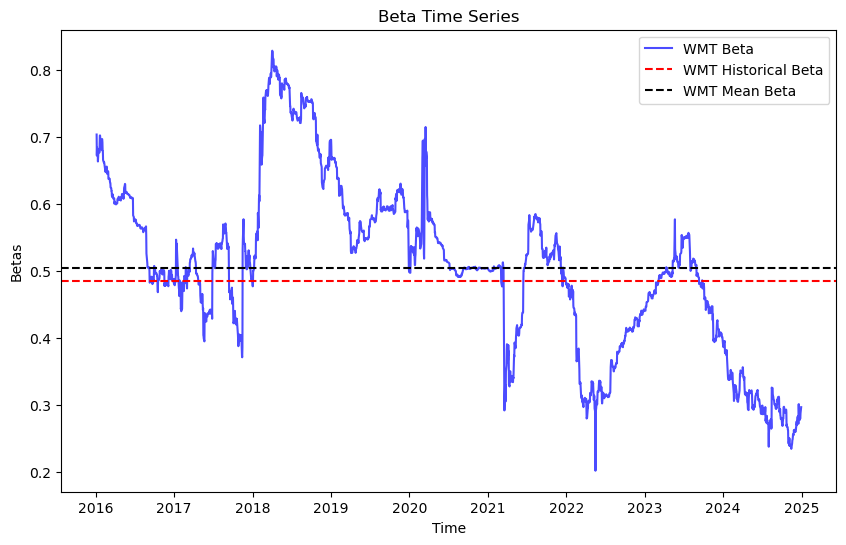

In [21]:
# Plot
ticker = 'WMT'

# Mean
mean = betas_df[ticker].mean()

# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(betas_df[ticker], label=f'{ticker} Beta', color='blue', alpha=0.7)
plt.axhline(y=betas_series.loc[ticker], color='red', linestyle='dashed', label=f'{ticker} Historical Beta')
plt.axhline(y=mean, color='black', linestyle='dashed', label=f'{ticker} Mean Beta')

# Config
plt.title('Beta Time Series')
plt.xlabel('Time')
plt.ylabel('Betas')
plt.legend()

# Show

plt.show()

In [22]:
# Compare Volatility and Betas for each stock
annualized_vol = df_returns[ticker].std() * np.sqrt(252)
comparison = betas_series.loc[ticker]/annualized_vol

print(f'{ticker} Historical Beta is: {betas_series.loc[ticker]}')
print(f'{ticker} Historical Annualized Standard Deviation is: {annualized_vol}')
print(f'{ticker} Ratio Between Both is: {comparison}')

WMT Historical Beta is: 0.4844550520337908
WMT Historical Annualized Standard Deviation is: 0.21123183060400325
WMT Ratio Between Both is: 2.2934756123095847


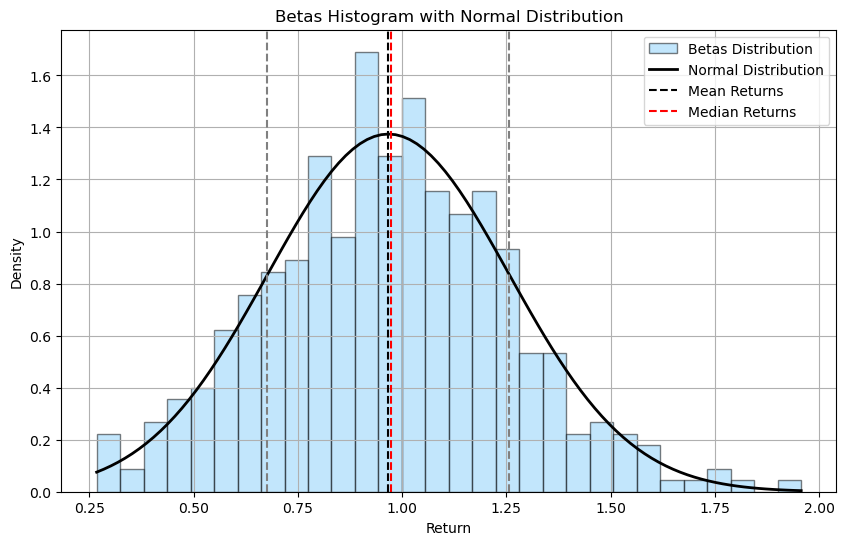

In [23]:
# Calculate Mean and Standard Deviation
mu = betas_series.mean()
sigma = betas_series.std()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(betas_series, bins=30, density=True, color='lightskyblue', alpha=0.5, edgecolor='black', label='Betas Distribution')

# Generate the Values of the Normal Distribution
x = np.linspace(betas_series.min(), betas_series.max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=betas_series.median(), color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('Betas Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

### Comparing Residuals ###

In [24]:
# Compute Residuals in the Alternative Way

stock = 'WMT'

# Common Index
common_index = df_excess_returns.index.intersection(betas_df.index).intersection(alpha_df.index).intersection(market_excess_returns.index)

# Cut DataFrames
r_i = df_excess_returns[stock].loc[common_index]
beta = betas_df[stock].loc[common_index]
r_m = market_excess_returns.loc[common_index]

# Calculate factor returns
r_f = compute_factor_contributions(r_m, beta)

# Calculate residual returns
residual_returns = compute_residual_returns(r_i, r_m, beta)
residual_returns.name = 'residual_returns'

residual_returns

2016-01-06    0.019240
2016-01-07    0.039136
2016-01-08   -0.015740
2016-01-11    0.010050
2016-01-12   -0.014566
                ...   
2024-12-23   -0.022809
2024-12-24    0.022288
2024-12-26    0.001208
2024-12-27   -0.009147
2024-12-30   -0.008861
Name: residual_returns, Length: 2245, dtype: float64

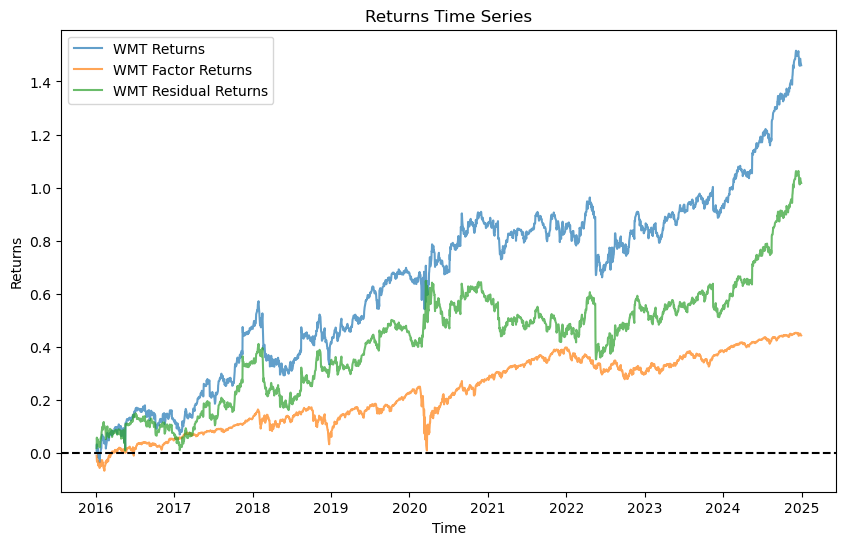

In [25]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(r_i.cumsum(), label=f'{stock} Returns', alpha=0.7)
plt.plot(r_f.cumsum(), label=f'{stock} Factor Returns', alpha=0.7)
plt.plot(residual_returns.cumsum(), label=f'{stock} Residual Returns', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='dashed')

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.show()

The method using the rolling betas adds so much noise to the calculation of the residual returns, especially because sometimes the alpha coefficient has a bias. So we prefer to use the residuals of the whole time stamp regression.

In [26]:
print(df_excess_returns.shape)
print(market_excess_returns.shape)
print(betas_df.shape)

(2645, 399)
(2645,)
(2245, 399)


In [27]:
# Calculate the Residual Returns for every stock
residual_returns_dict = {}

# Create the Loop to Obtain the Betas
for ticker in tickers:
    df = compute_residual_returns(
        df_excess_returns[ticker].loc[common_index], 
        market_excess_returns.loc[common_index],
        betas_df[ticker]
    )
    
    residual_returns_dict[ticker] = df

# Create the DataFrame
df_residual_returns = pd.DataFrame.from_dict(residual_returns_dict)

df_residual_returns['NVDA']

2016-01-06   -0.026580
2016-01-07   -0.011652
2016-01-08   -0.008645
2016-01-11    0.000670
2016-01-12    0.007410
                ...   
2024-12-23    0.017060
2024-12-24   -0.025068
2024-12-26   -0.000776
2024-12-27    0.008715
2024-12-30    0.032114
Name: NVDA, Length: 2245, dtype: float64

In [28]:
# Save the data
betas_series.to_csv(r"..\additional_data\capm_sbetas.csv")
df_residual_returns.to_csv(r"..\additional_data\capm_residual_returns.csv")